In [296]:
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [298]:
dataframe = pd.read_csv("weatherHistory.csv")

In [299]:
dataframe.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [300]:
dataframe = dataframe.head(2000)

In [301]:
dataframe = dataframe.rename(columns=({'Apparent Temperature (C)':'y'}))

In [302]:
dataframe = dataframe.drop(['Formatted Date','Summary','Precip Type','Loud Cover','Daily Summary'], axis =1 )

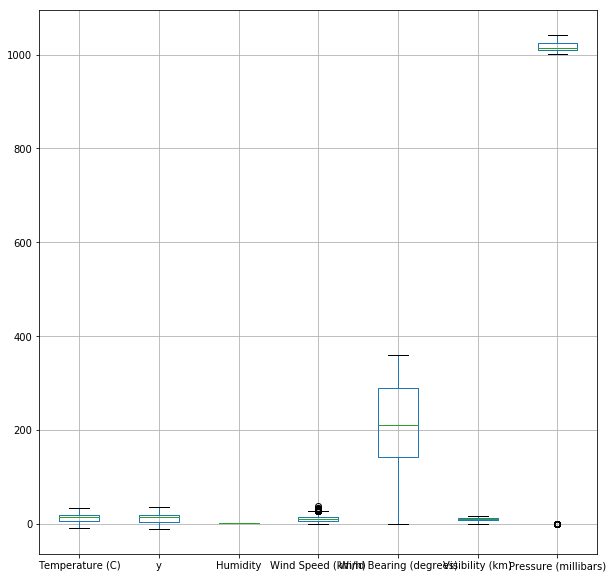

In [303]:
dataframe.boxplot(figsize=(10,10))

In [304]:
dataframe = preprocess_obj.remove_outlier(dataframe)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5bbef0908>,
      dtype=object)

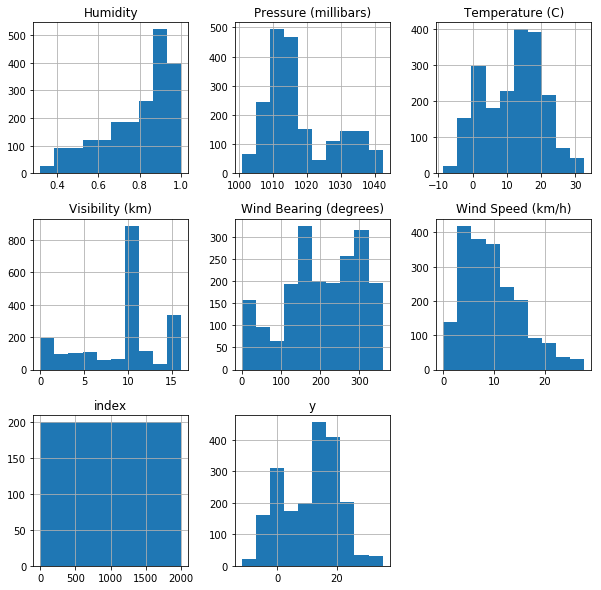

In [305]:
dataframe.hist(figsize=(10,10))

In [306]:
dataframe = dataframe.dropna()

In [307]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 1999
Data columns (total 8 columns):
index                     1924 non-null int64
Temperature (C)           1924 non-null float64
y                         1924 non-null float64
Humidity                  1924 non-null float64
Wind Speed (km/h)         1924 non-null float64
Wind Bearing (degrees)    1924 non-null float64
Visibility (km)           1924 non-null float64
Pressure (millibars)      1924 non-null float64
dtypes: float64(7), int64(1)
memory usage: 135.3 KB


In [308]:
(dataframe==0).sum()

index                      1
Temperature (C)            3
y                          1
Humidity                   0
Wind Speed (km/h)         11
Wind Bearing (degrees)    18
Visibility (km)            6
Pressure (millibars)       0
dtype: int64

In [309]:
dataframe, test_data = preprocess_obj.split(dataframe,500)

In [310]:
y = dataframe['y']

In [311]:
for item in dataframe:
    dataframe[item] = preprocess_obj.feature_scaling(dataframe,item)    

In [312]:
# dataframe['y']=y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5bbe0a908>,
      dtype=object)

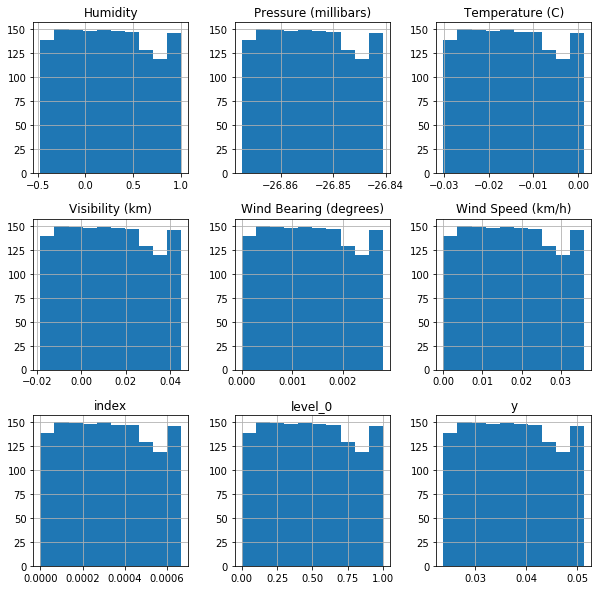

In [313]:
dataframe.hist(figsize=(10,10))

In [314]:
# sns.distplot(dataframe, color=['r','g','b','y','black','#ed0740','#ed9c07'])
# for items in dataframe:
#     sns.distplot(dataframe[items])
#     plt.show()

In [315]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
level_0,1424.0,0.490753,0.286165,0.000000,0.245154,0.484291,0.726771,1.000000
index,1424.0,0.000328,0.000191,0.000000,0.000164,0.000324,0.000486,0.000668
Temperature (C),1424.0,-0.014670,0.009032,-0.030160,-0.022422,-0.014874,-0.007221,0.001403
y,1424.0,0.037332,0.007870,0.023835,0.030577,0.037154,0.043823,0.051337
Humidity,1424.0,0.251108,0.420830,-0.470588,-0.110068,0.241605,0.598193,1.000000
Wind Speed (km/h),1424.0,0.017691,0.010316,0.000000,0.008837,0.017458,0.026199,0.036049
Wind Bearing (degrees),1424.0,0.001367,0.000797,0.000000,0.000683,0.001349,0.002024,0.002786
Visibility (km),1424.0,0.012710,0.018100,-0.018330,-0.002824,0.012302,0.027639,0.044920
Pressure (millibars),1424.0,-26.854208,0.007682,-26.867383,-26.860801,-26.854381,-26.847872,-26.840537


In [316]:
class Gradient_multilinear:

    def __init__(self):
        self.learning_rate = 0.001
        self.iteration = 500
        self.sample_size = 1000
        
    def mini_sampler(self,dataframe,counter):
        dataframe = dataframe.loc[(counter*self.sample_size):(counter*self.sample_size)+self.sample_size,:]
        try:
            dataframe.drop('index')
        except Exception as e:
            pass
        return dataframe
    
    def train(self, dataframe):
        weights = np.full((1,dataframe.shape[1]-1),0.0)
        dframe_size = len(dataframe)
        bais = 1.0
        for iterations in range(0,self.iteration):
            for counter in range(0, int(dataframe.shape[0]/self.sample_size)):
                sample_df = self.mini_sampler(dataframe,counter)
                sample_df,output = preprocess_obj.separate(sample_df,'y')
                output = np.array(output).reshape(output.shape[0],1)
                Ypred = np.add(np.matmul(weights,sample_df.T),bais).reshape(sample_df.shape[0],1)
                print(Ypred[0])
                diff = np.subtract(Ypred,output)
                cost = np.divide(np.sum(np.square(diff)),(2*sample_df.shape[0]))
#                 cost = np.sum(np.square(diff))/(2*dframe_size)
                if (cost==np.inf):
                    print(diff.T,Ypred.T,output.T,iterations,counter)
                dw = np.divide(np.matmul(np.abs(diff).T,sample_df),sample_df.shape[0])
                db = np.divide(np.sum(np.abs(diff)),sample_df.shape[0])
                weights = np.subtract(weights,np.multiply(self.learning_rate,dw))
                bais -= np.multiply(self.learning_rate,db)
            if iterations%50==0:
                print(cost)
                plt.plot(iterations,cost,markersize = 0.8,marker='*',color='r')
        return weights,bais
        
    def test(self,test_data,weights,bais):
        test_data,output = preprocess_obj.separate(test_data,'y')
        Ypred = np.add(np.matmul(weights,test_data.T),bais)
        error = np.divide(np.sum(np.abs(np.subtract(Ypred,output))),test_data.shape[0])
        print((1-error)*100)

In [317]:
grad_obj = Gradient_multilinear()

In [318]:
weights = np.full((1,dataframe.shape[1]-1),1.0)

[1.]
0.467325516475059
[0.30142373]
[0.10755509]
[0.05375216]
[0.03882004]
[0.03421832]
[0.03087061]
[0.0273799]
[0.02278966]
[0.01535262]
[0.00254165]
[-0.01952581]
[-0.05753741]
[-0.1230125]
[-0.23579293]
[-0.43005595]
[-0.76467121]
[-1.34104062]
[-2.33382709]
[-4.04388424]
[-6.98942687]
[-12.06307043]
[-20.80232848]
[-35.85553977]
[-61.78441879]
[-106.44643447]
[-183.37593181]
[-315.88556992]
[-544.13097323]
[-937.27946265]
[-1614.47047003]
[-2780.91946473]
[-4790.10629975]
[-8250.89348865]
[-14212.03545759]
[-24479.9923218]
[-42166.35824146]
[-72630.79664679]
[-125105.22873517]
[-215491.46813814]
[-371180.09492726]
[-639350.87702348]
[-1101270.0926603]
[-1896917.40407332]
[-3267405.19225883]
[-5628045.07707103]
[-9694203.64762153]
[-16698086.63173678]
[-28762145.62108787]
[-49542264.25365578]
[-85335634.52519953]
3639943174078830.0
[-1.46989053e+08]
[-2.53185928e+08]
[-4.36108081e+08]
[-7.51188108e+08]
[-1.29390763e+09]
[-2.22873198e+09]
[-3.83894965e+09]
[-6.61251981e+09]
[-1.1389

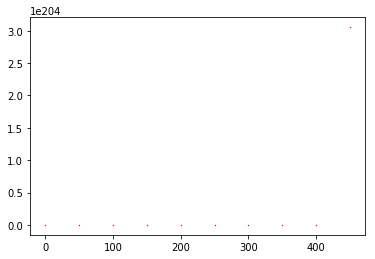

In [319]:
weights,bais = grad_obj.train(dataframe)

In [320]:
grad_obj.test(test_data,weights,bais)

NameError: name 'output' is not defined

In [ ]:
(dataframe==0).sum()